## Most in-demand skills for the top 3 most popular data roles

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from plot_utils import save_plot_for_github

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else(x))

In [2]:
df_Germany = df[df['job_country'] == 'Germany']

2.1. Skills Analysis

In [3]:
# Creating Exploded DataFrame for Skills Analysis
df_skills = df_Germany.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",python
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",sql
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",c#
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",azure
2,"Data Engineer/Scientist/Analyst, Mid or Senior...",airflow
...,...,...
785735,Senior Data Engineer,docker
785737,CRM Data Analyst,sas
785737,CRM Data Analyst,sas
785737,CRM Data Analyst,sql


In [4]:
# Counting Occurrences of Each Skill per Job Title
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count
type(df_skills_count)

pandas.Series

In [5]:
df_skills_count.index.name = 'job_skills'
df_skills_count = df_skills_count.reset_index(name='skill_count')

In [6]:
# Sorting Skills by Count
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
907,python,Data Scientist,4157
906,python,Data Engineer,3524
1139,sql,Data Engineer,3145
1138,sql,Data Analyst,2947
905,python,Data Analyst,2309
...,...,...,...
1369,yarn,Data Analyst,1
1371,yarn,Data Scientist,1
1375,zoom,Data Engineer,1
792,outlook,Cloud Engineer,1


2.2. Sorting skills based on most in-demand Job Titles

In [7]:
# Getting Top 3 Job Titles
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

2.3. Plotting Top Skills in Job Postings

✅ Full PNG saved: docs/images/2.1. Top Data Skills in Job Postings in Germany.png (2400px wide with scale=2)
✅ Preview saved: docs/images/2.1. Top Data Skills in Job Postings in Germany_preview.png (800px wide)
✅ HTML saved: docs/2.1. Top Data Skills in Job Postings in Germany.html (9.5 KB)


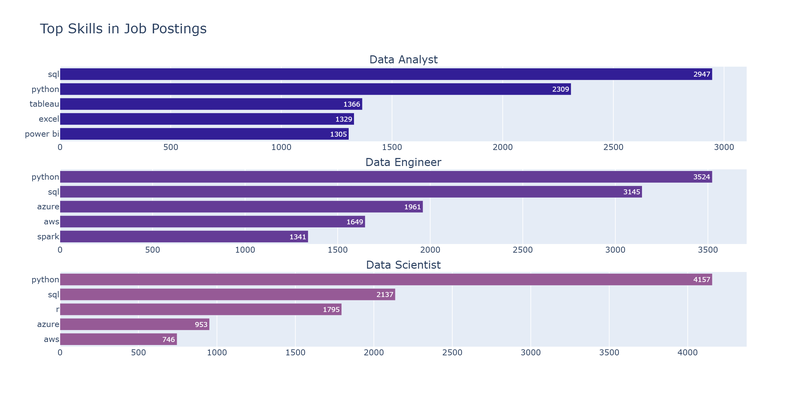

📊 Preview displayed in notebook (800px wide)


{'png_full': 'docs/images/2.1. Top Data Skills in Job Postings in Germany.png',
 'preview': 'docs/images/2.1. Top Data Skills in Job Postings in Germany_preview.png',
 'html': 'docs/2.1. Top Data Skills in Job Postings in Germany.html',
 'preview_width': 800}

In [8]:
# Creating Subplots for Top Skills per Job Title
fig = make_subplots(
    rows=len(job_titles),
    cols=1,
    subplot_titles=job_titles,
    vertical_spacing=0.1
)

for i, job_title in enumerate(job_titles, 1):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)

    fig.add_trace(
        go.Bar(
            y=df_plot['job_skills'],
            x=df_plot['skill_count'],
            orientation='h',
            name=job_title,
            text=df_plot['skill_count'],
            textposition='auto',
            marker_color=f'rgb({i*50}, {i*30}, {150})'
        ),
        row=i, col=1
    )

    fig.update_yaxes(autorange='reversed', row=i, col=1)

    fig.update_yaxes(title_text="", row=i, col=1)

    fig.update_traces(showlegend=False)

fig.update_layout(
    height=300 * len(job_titles),
    title_text = "Top Skills in Job Postings",
    title_font_size=20,
    showlegend=False,
    barmode='group'
)

save_plot_for_github(fig, '2.1. Top Data Skills in Job Postings in Germany')

In [9]:
# Counting Total Job Postings per Job Title
df_job_title_count = df_Germany['job_title_short'].value_counts().reset_index(name='jobs_total')

2.4. Adding percentages for a clearer picture

In [10]:
# Calculating Skill Percentage per Job Title
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['skill_percent'] = (100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']).round(2)
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,4157,6745,61.63
1,python,Data Engineer,3524,6675,52.79
2,sql,Data Engineer,3145,6675,47.12
3,sql,Data Analyst,2947,7131,41.33
4,python,Data Analyst,2309,7131,32.38
...,...,...,...,...,...
1377,yarn,Data Analyst,1,7131,0.01
1378,yarn,Data Scientist,1,6745,0.01
1379,zoom,Data Engineer,1,6675,0.01
1380,outlook,Cloud Engineer,1,189,0.53


2.5. Plotting Likelihood of Skills Requested in Germany Job Postings

✅ Full PNG saved: docs/images/2.2. Likelihood of Top Data Skills in Job Postings in Germany.png (2400px wide with scale=2)
✅ Preview saved: docs/images/2.2. Likelihood of Top Data Skills in Job Postings in Germany_preview.png (800px wide)
✅ HTML saved: docs/2.2. Likelihood of Top Data Skills in Job Postings in Germany.html (10.0 KB)


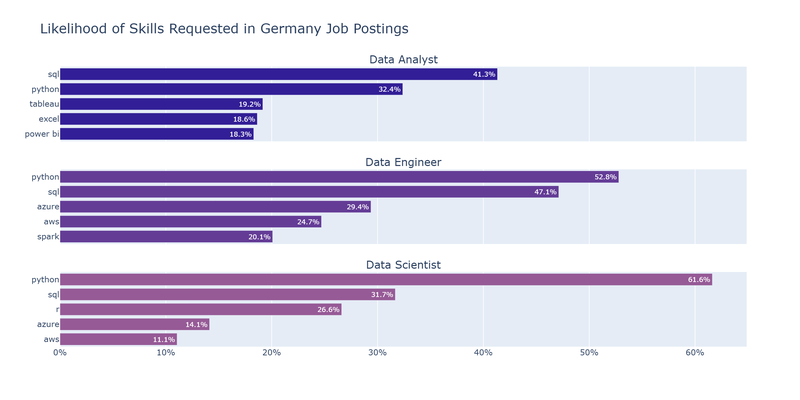

📊 Preview displayed in notebook (800px wide)


{'png_full': 'docs/images/2.2. Likelihood of Top Data Skills in Job Postings in Germany.png',
 'preview': 'docs/images/2.2. Likelihood of Top Data Skills in Job Postings in Germany_preview.png',
 'html': 'docs/2.2. Likelihood of Top Data Skills in Job Postings in Germany.html',
 'preview_width': 800}

In [11]:
# Creating Subplots for Top Skills per Job Title by Percentage
fig = make_subplots(
    rows=len(job_titles),
    cols=1,
    subplot_titles=job_titles,
    vertical_spacing=0.1,
    shared_xaxes=True
)

for i, job_title in enumerate(job_titles, 1):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)

    fig.add_trace(
        go.Bar(
            y=df_plot['job_skills'],
            x=df_plot['skill_percent'],
            orientation='h',
            name=job_title,
            text=df_plot['skill_percent'].apply(lambda x: f"{x:.1f}%"),
            textposition='auto',
            marker_color=f'rgb({i*50}, {i*30}, {150})',
            hovertemplate='<b>%{y}</b><br>Percentage: %{x:.1f}%<extra></extra>'
        ),
        row=i, col=1
    )

    fig.update_yaxes(autorange='reversed', row=i, col=1)
    fig.update_yaxes(title_text="", row=i, col=1)
    fig.update_xaxes(
        ticksuffix='%', 
        row=i, col=1
    )

fig.update_layout(
    height=300 * len(job_titles),
    title_text="Likelihood of Skills Requested in Germany Job Postings",
    title_font_size=20,
    showlegend=False,
    barmode='group'
)

save_plot_for_github(fig, '2.2. Likelihood of Top Data Skills in Job Postings in Germany')